# Chi-Score Analysis: Quick-Use
This notebook provides three cells to install the analysis, run the full analysis on an input sequence with user-defined parameters, and visualize the results and solution(s).

# Installation:
If you have already downloaded the chi_score_analysis.py file to the working directory, you can skip the following cell. Otherwise, execute the cel below to download the module. 

In [22]:
!pip install wget
import wget

wget.download('https://raw.githubusercontent.com/MWPlabUTSW/Chi-Score-Analysis/main/chi_score_analysis.py')


[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


100% [..............................................................................] 27326 / 27326

'chi_score_analysis (1).py'

# Analysis:
Execute the following cell to run the full analysis on the input amino acid sequence. Sequence should be input as string of capitalized one-letter amino acid codes. You may also adjust the following parameters as desired:
- window_sizes: the subsequence lengths to use when generating initial set of boundaries, input as a list of EVEN integer values. Values must be even so that the subsequences are centered on the spaces between residues (where boundaries will occur) and not directly on a residue.
- residue_groups: the scheme to use for grouping amino acids. By default, this is set to 'twenty', which leaves the 20 amino acids ungrouped. If you wanted 11 groups, for example, you would enter 'eleven'. The full list of supported grouping schemese can be recalled by executing 'xid.residue_groups' in a new cell.

When the analyis is complete, the cell will output a list of solutions, each containing the boundary positions and corresponding z-scores after each iterative removal of a low-scoring boundary. 

In [23]:
import chi_score_analysis as xid

sequence = 'MNTRKSETSKTVSATPVKRRSTRITNLPKSAPKIVKRSSVRLRGAPQCTYKSDSSSSSSSSDSDGEDEYAATKDELKAVDHDNQMEIDFSDEIGENFSEEDSCSDKENRRVTRSRTPTRLEETPSKRLARELSKASVSKVSTSKTLFKESKSPRKVEISRKTNKARVFQEEDDDDEDDFSDEIDEKFYSKTNKRTPITIKIPSKMITQKVTPLVISKTPGGTLRTRRRARQNSEELEDLVDPLDS'
window_sizes = [12]
residue_groups = 'twenty'

solutions = xid.analyze_sequence(sequence, window_sizes, residue_groups)
solutions

Now calculating boundaries for window sizes 12 through 12
Now clustering boundaries and determining initial solution.
Now calculating z-scores and trimming low-confidence boundaries.


[[[52.0, 65.0, 82.0, 106.0, 166.0, 187.0, 228.0],
  [3.489, 4.058, 1.28, 5.112, 7.342, 6.588, 2.994]],
 [[52.0, 65.0, 82.0, 106.0, 166.0, 187.0, 228.0],
  [3.489, 4.058, 1.28, 5.112, 7.342, 6.588, 2.994]],
 [[52.0, 65.0, 106.0, 166.0, 187.0, 228.0],
  [3.489, 1.215, 4.184, 7.342, 6.588, 2.994]],
 [[52.0, 106.0, 166.0, 187.0, 228.0], [3.932, 5.068, 7.342, 6.588, 2.994]]]

# Plot Solution
Execute the following cell to visualize the pairwise matrix for the input sequence and plot a solution. The following parameters may be altered as desired:
- window_size: the subsequence length to use when generating the pairwise matrix, entered as an integer (even integers recommended)
- solution: the solution to be plotted onto the pairwise matrix, can be entered in two ways: 1) as a float value indicating the minimum z-score to allow in the solution, or 2) as a list of boundary positions to be plotted. If the former is used, the solution to plot is determined from the solutions output in the previous cell; if the latter is used, the positions entered will simply be plotted. To plot the matrix with no solutions, input an empty list ([]).
- name: name of sequence being visualized, entered as a string.
- outfile: the pathname to which the figure will be saved, if desired.

FileNotFoundError: [Errno 2] No such file or directory: 'PATH\\TO\\OUTPUT\\FILE.png'

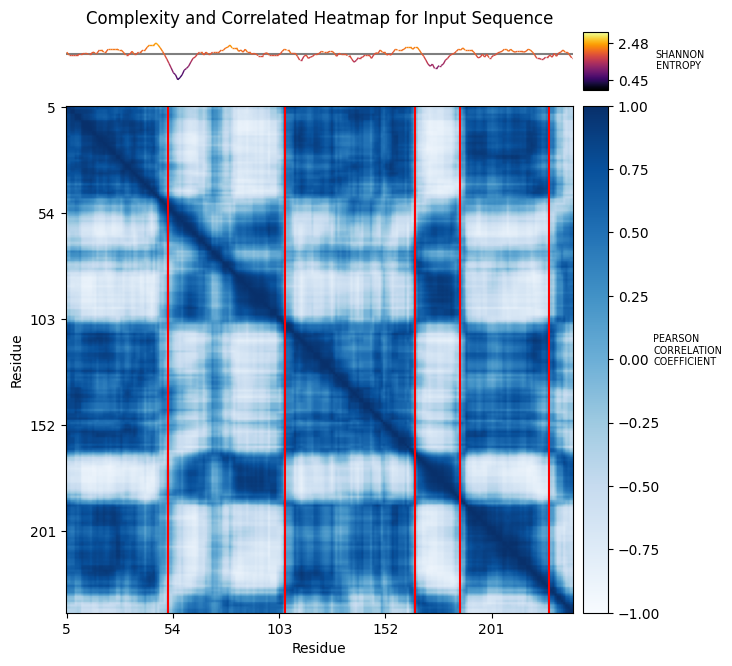

In [28]:
import matplotlib.pyplot as plt

window_size = 12
solution = 1.96
name = 'Input Sequence'
outfile = False


if isinstance(solution, float):
    c = 0
    while min(solutions[c][1]) < solution:
        c += 1
    solution = solutions[c][0]

xid.get_modules(sequence, solution)
xid.plot_solution(sequence, xid.get_corr_scores(xid.get_heatmap_scores(sequence, window_size)), solution, window_size, name)

if isinstance(outfile, str):
    plt.savefig(outfile, bbox_inches = 'tight')
    